# SYS 611: Inventory Model

Paul T. Grogan <pgrogan@stevens.edu>

This example constructs a simulation model for an inventory system using the event-centric perspective.

## Dependencies

This example is compatible with Python 2 environments through use of the `__future__` library function. Additionally, this example uses the `numpy` and `matplotlib.pyplot` libraries.

In [4]:
# import the python3 behavior for importing, division, and printing in python2
from __future__ import absolute_import, division, print_function

# import the numpy package and refer to it as `np`
import numpy as np

# import the matplotlib.pyplot package and refer to it as `plt`
import matplotlib.pyplot as plt

## Process Generators

The two process generators that are required to model an inventory system are inter-arrival duration (time between customer arrivals) and demand. While not required for the general model, the inter-arrival generator uses an exponentially-distributed random variable while the demand generator uses a uniform discrete random variable.

In [5]:
arrival_rate = 5 # customers per day
demand_lb = 1 # items per customer
demand_ub = 4 # items per customer

# define process generator for inter-arrival duration
def generate_interarrival():
    # generates a customer inter-arrival time
    return np.random.exponential(scale=1./arrival_rate)

# define process generator for customer demand
def generate_demand():
    # generates a customer demand
    return np.random.randint(demand_lb, demand_ub+1)

## State Transition Function

The state transition function processes the model logic. This function computes updates to *all* simulation variables.

In [11]:
product_price = 100.00 # dollars per item
product_cost = 50.00 # dollars per item
holding_cost = 2.00 # dollars per item per day
order_trigger = 15 # items
order_target = 20 # items
delivery_delay = 2 # days

def _delta(t, x, y, t_C, t_D, R, E_o, E_h):
    # compute the holding expense for current inventory since last time
    E_h += holding_cost*x*(min(t_C, t_D) - t)
    # update the simulation time
    t = min(t_C, t_D)
    
    # check if this is a customer event (the tie-breaker if same time)
    if t == t_C:
        # generate the customer demand
        D = generate_demand()
        
        # check if inventory exceeds demands - can meet all demand
        if x > D:
            # update revenue and inventory levels after sale
            R += product_price*D
            x -= D
        # otherwise can only meet partial demand
        else:
            # update revenue and inventory levels after sale
            R += product_price*x
            x = 0
        
        # check if inventory falls below order trigger and no order in progress
        if x < order_trigger and y == 0:
            # place an order, update order expense and delivery event time
            y = order_target - x
            E_o += product_cost*y
            t_D = t + delivery_delay
        
        # generate the next customer arrival
        t_C += generate_interarrival()
    # check if this is a delivery event
    else:
        # add the ordered products to the inventory        
        x += y
        
        # reset the number ordered and delivery time
        y = 0
        t_D = float('inf')
    return t, x, y, t_C, t_D, R, E_o, E_h

## Simulation

Generate a state trajectory for a specified number of state transitions.

Time = 0.16
Inventory on Hand = 16
Amount on Order = 0
Event list = t_C: 0.2, t_D: inf
Order Expenses = 0.00
Holding Expenses = 6.35
Revenue = 400.00

Time = 0.21
Inventory on Hand = 15
Amount on Order = 0
Event list = t_C: 0.4, t_D: inf
Order Expenses = 0.00
Holding Expenses = 8.00
Revenue = 500.00

Time = 0.43
Inventory on Hand = 11
Amount on Order = 9
Event list = t_C: 0.6, t_D: 2.4
Order Expenses = 450.00
Holding Expenses = 14.73
Revenue = 900.00

Time = 0.63
Inventory on Hand = 10
Amount on Order = 9
Event list = t_C: 0.8, t_D: 2.4
Order Expenses = 450.00
Holding Expenses = 18.99
Revenue = 1000.00

Time = 0.80
Inventory on Hand = 7
Amount on Order = 9
Event list = t_C: 1.1, t_D: 2.4
Order Expenses = 450.00
Holding Expenses = 22.47
Revenue = 1300.00



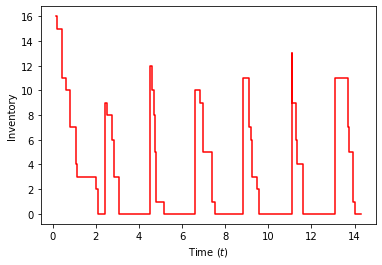

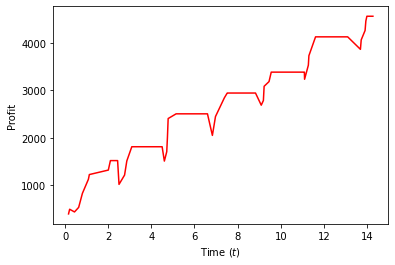

In [21]:
# initialize variables
t = 0 # simulation time
x = 20 # inventory
y = 0 # number ordered
t_C = generate_interarrival() # time of next customer arrival
t_D = np.inf # time of next customer departure
R = 0 # cumulative revenue
E_o = 0 # cumulative order expense
E_h = 0 # cumulative holding expense

# initialize data lists for plotting
plot_t = [] # simulation time
plot_x = [] # inventory
plot_P = [] # profit (revenue minus expenses)

# function to print the current state
def print_state():
    print('Time = {:.2f}'.format(t))
    print('Inventory on Hand = {:d}'.format(x))
    print('Amount on Order = {:d}'.format(y))
    print('Event list = t_C: {:.1f}, t_D: {:.1f}'.format(t_C, t_D))
    print('Order Expenses = {:.2f}'.format(E_o))
    print('Holding Expenses = {:.2f}'.format(E_h))
    print('Revenue = {:.2f}'.format(R))
    print('')

# iterate over the first 14.0 days
while t < 14.0:
    t, x, y, t_C, t_D, R, E_o, E_h = _delta(t, x, y, t_C, t_D, R, E_o, E_h)
    
    # print the simulation state for first 1.0 days
    if t < 1.0: print_state()
    
    # append data for plotting
    plot_t.append(t)
    plot_x.append(x)
    plot_P.append(R-E_o-E_h)

# plot the inventory state trajectory
plt.figure()
plt.step(plot_t, plot_x, '-r', where='post')
plt.xlabel('Time ($t$)')
plt.ylabel('Inventory')
plt.show()

# plot the profit state trajectory
plt.figure()
plt.plot(plot_t, plot_P, '-r')
plt.xlabel('Time ($t$)')
plt.ylabel('Profit')
plt.show()